# Call Centre
## Setup

This is a test on basic data processing. The test is tool-agnostic; you may use any data processing tool you like. Typical examples would include, Excel, python / pandas, matlab, SQL etc. The test is timed to last approximately 2 hours. Points available for each question are marked in [brackets].
 
You have been given 3 csv files:

- leads.csv. This is a list of fictitious company directors, with some basic data about them and their company.

- calls.csv. This is a list of fictitious calls made by an outbound call centre. The call centre consists of several agents, who make calls one after the other. They don’t get to choose who to call, the system does. The objective of the call is to get the lead to signup on the website. When they finish a call, they mark down the outcome, from a fixed list of possible outcomes. Note that a single lead may be called multiple times.

- signups.csv. This is a list of leads who signed up after being called by someone from the call centre. Each signup was risk assessed and either approved or rejected for a loan.


## Questions

- Which agent made the most calls? [1]  

**Orange**
- For the leads that received one or more calls, how many calls were received on average? [2] 

** avg: 1.8 **
- For the leads that signed up, how many calls were received, on average? [2] 

** avg: 2.1 **
- Which agent had the most signups? Which assumptions did you make? (note that there is a many-to-one relationship between calls and leads) [4]

** The agent RED had the most signups. I assumed that a good indication of signups is the number of INTERESTED Leads that each agent had and the difference between CALL BACK LATER and INTERESTED outcome. Agent RED had the biggest difference between these two outcomes. **
- Which agent had the most signups per call? [2]

** Agent BLUE had the most signups per call with 0.26 ratio. But I would say that this ratio is not accurate (and is just a lucky strike) because the total number of calls made by agent BLUE is so much lower compared to other agents. I would say that agent RED is the one with the highest signups per call average among the agents. **
- Was the variation between the agents’ signups-per-call statistically significant?

** Was not for all the agents. **
- Why? [5]

** The difference was not always statistically significant because the sample size of certain agents was too small. **
- A lead from which region is most likely to be “interested” in the product? [3]

** north-west. **
- A lead from which sector is most likely to be “interested” in the product? [1]

** consultancy. **
- Given a lead has already expressed interest and signed up, 
 - signups from which region are most likely to be approved? [2]
 
 ** north-west. **
 - Is this statistically significant? Why? [5]
 
 ** Like before, the sample for some regions are too small to be statistically significant.**
- Suppose you wanted to pick the 1000 leads most likely to sign up (who have not been called so far), based only on age, sector and region.
 - What criteria would you use to pick those leads? [10]
 
 ** Age 18-20 -- Region nort-west, south-west -- Sector food, retail, consultancy, wholesale.***
 - In what sense are those an optimal criteria set? [3]
 
 ** These are the top criteria for leads who signed up for the product. **
 - How many signups would you expect to get based on those called leads, assuming they were being called by random agents? [3]
 
 ** Around 10% of the sample, so 100 leads.**
 - If you could choose the agents to make those calls, who would you choose? Why? [3]
 
 ** I would chose agent RED because he has the highest, statistically significant, signup per call average.**
 


In [30]:
import pandas as pd
from itertools import combinations
from scipy.stats import ttest_ind
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 15)

Populating the interactive namespace from numpy and matplotlib


In [2]:
calls = pd.read_csv('calls.csv')
leads = pd.read_csv('leads.csv')
signups = pd.read_csv('signups.csv')

In [6]:
print calls.shape
calls.head()

(5000, 4)


,Phone Number,Call Outcome,Agent,Call Number
0,83473306392,NOT INTERESTED,orange,0
1,762850680150,CALL BACK LATER,orange,1
2,476309275079,NOT INTERESTED,orange,2
3,899921761538,CALL BACK LATER,red,3
4,906739234066,CALL BACK LATER,orange,4


In [7]:
print leads.shape
leads.head()

(9994, 5)


,Name,Phone Number,Region,Sector,Age
0,Isabela MEZA,175718505368,north-west,wholesale,19
1,Deangelo LEE,937521423043,north-west,retail,38
2,Rosia MENDEZ,403640999962,midlands,agriculture,40
3,Jeremiah GALLOWAY,946740713605,scotland,food,23
4,Sarah POPE,264176984341,midlands,retail,18


In [8]:
print signups.shape

signups.head()

(768, 2)


,Lead,Approval Decision
0,Tyree TERRY,APPROVED
1,Ansel WOOD,REJECTED
2,Ludwig DIAZ,APPROVED
3,Mack ARELLANO,APPROVED
4,Judy HENDRICKS,REJECTED


In [9]:
# Which agent made the most calls?
calls.Agent.value_counts()

orange    2234
red       1478
black      750
green      339
blue       199
Name: Agent, dtype: int64

Number of calls on average:  1.8395879323


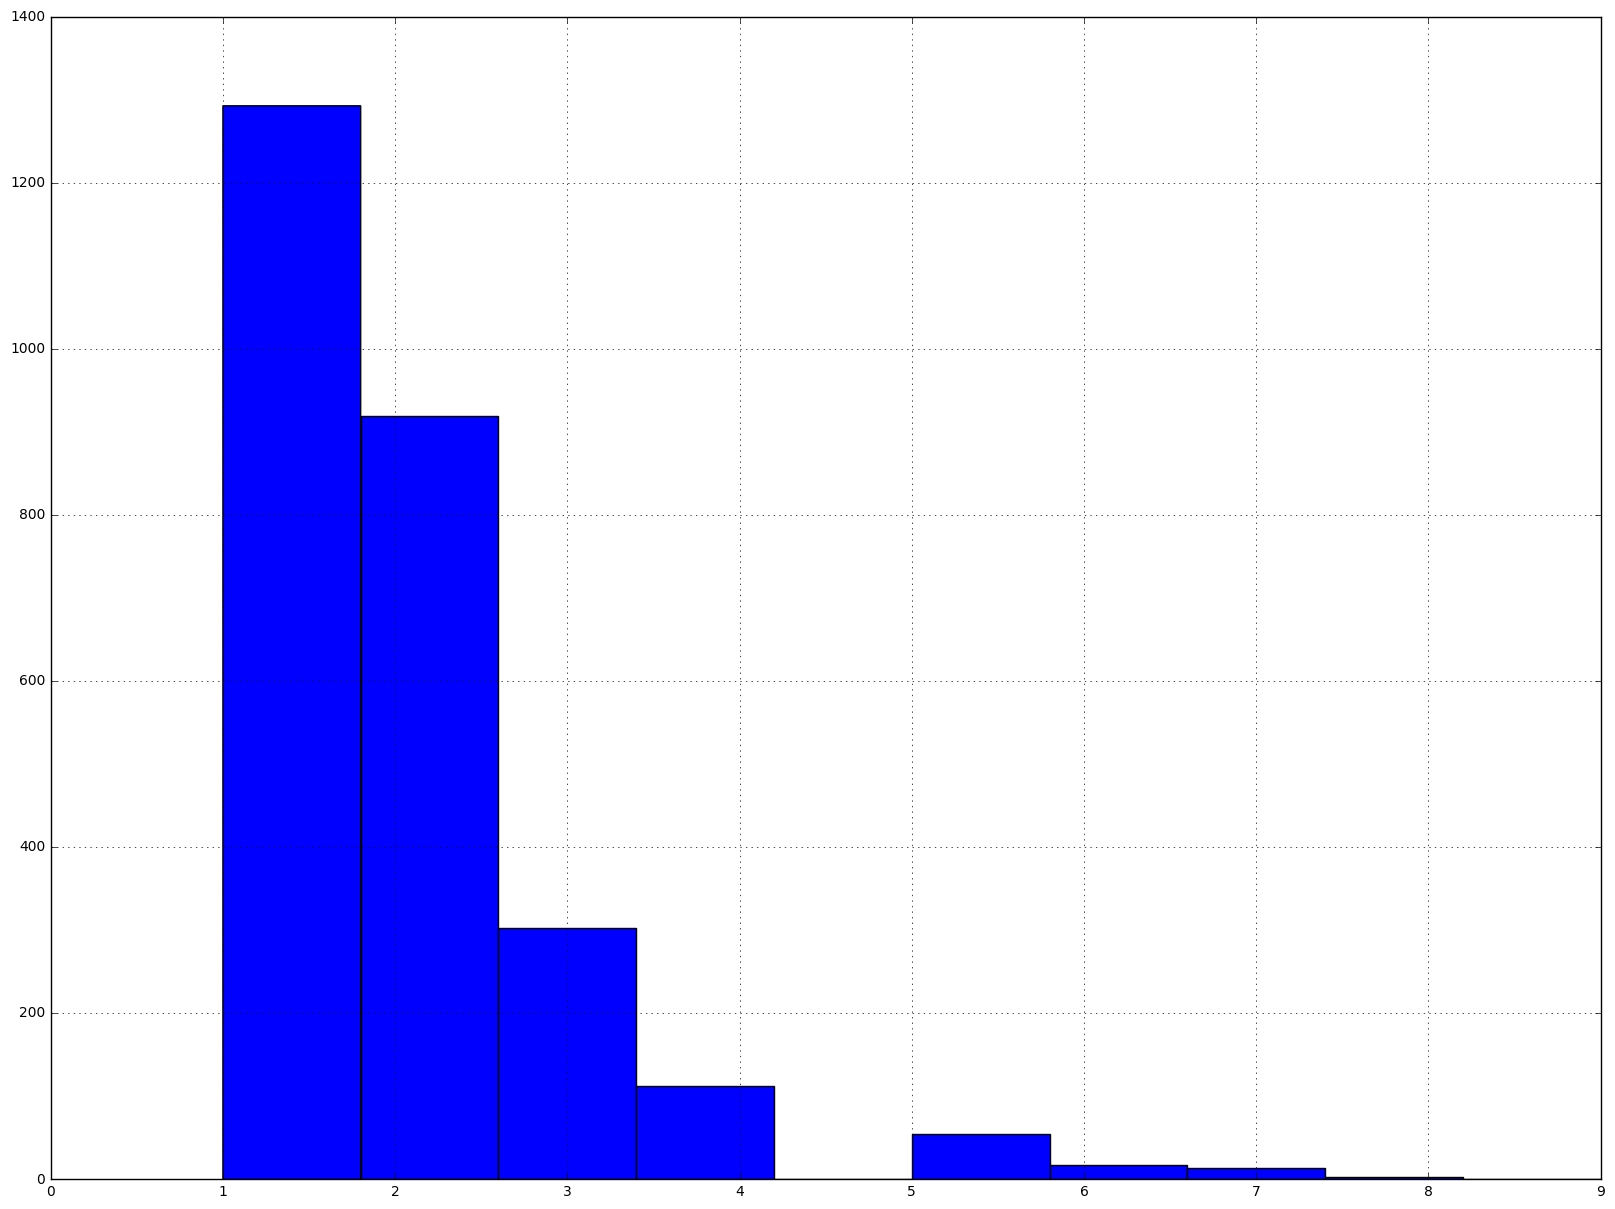

In [33]:
# For the leads that received one or more calls, how many calls were received on average?
print 'Number of calls on average: ',calls.groupby('Phone Number')['Call Outcome'].count().mean()
calls.groupby('Phone Number')['Call Outcome'].count().hist()

Number of calls on average:  2.09895833333


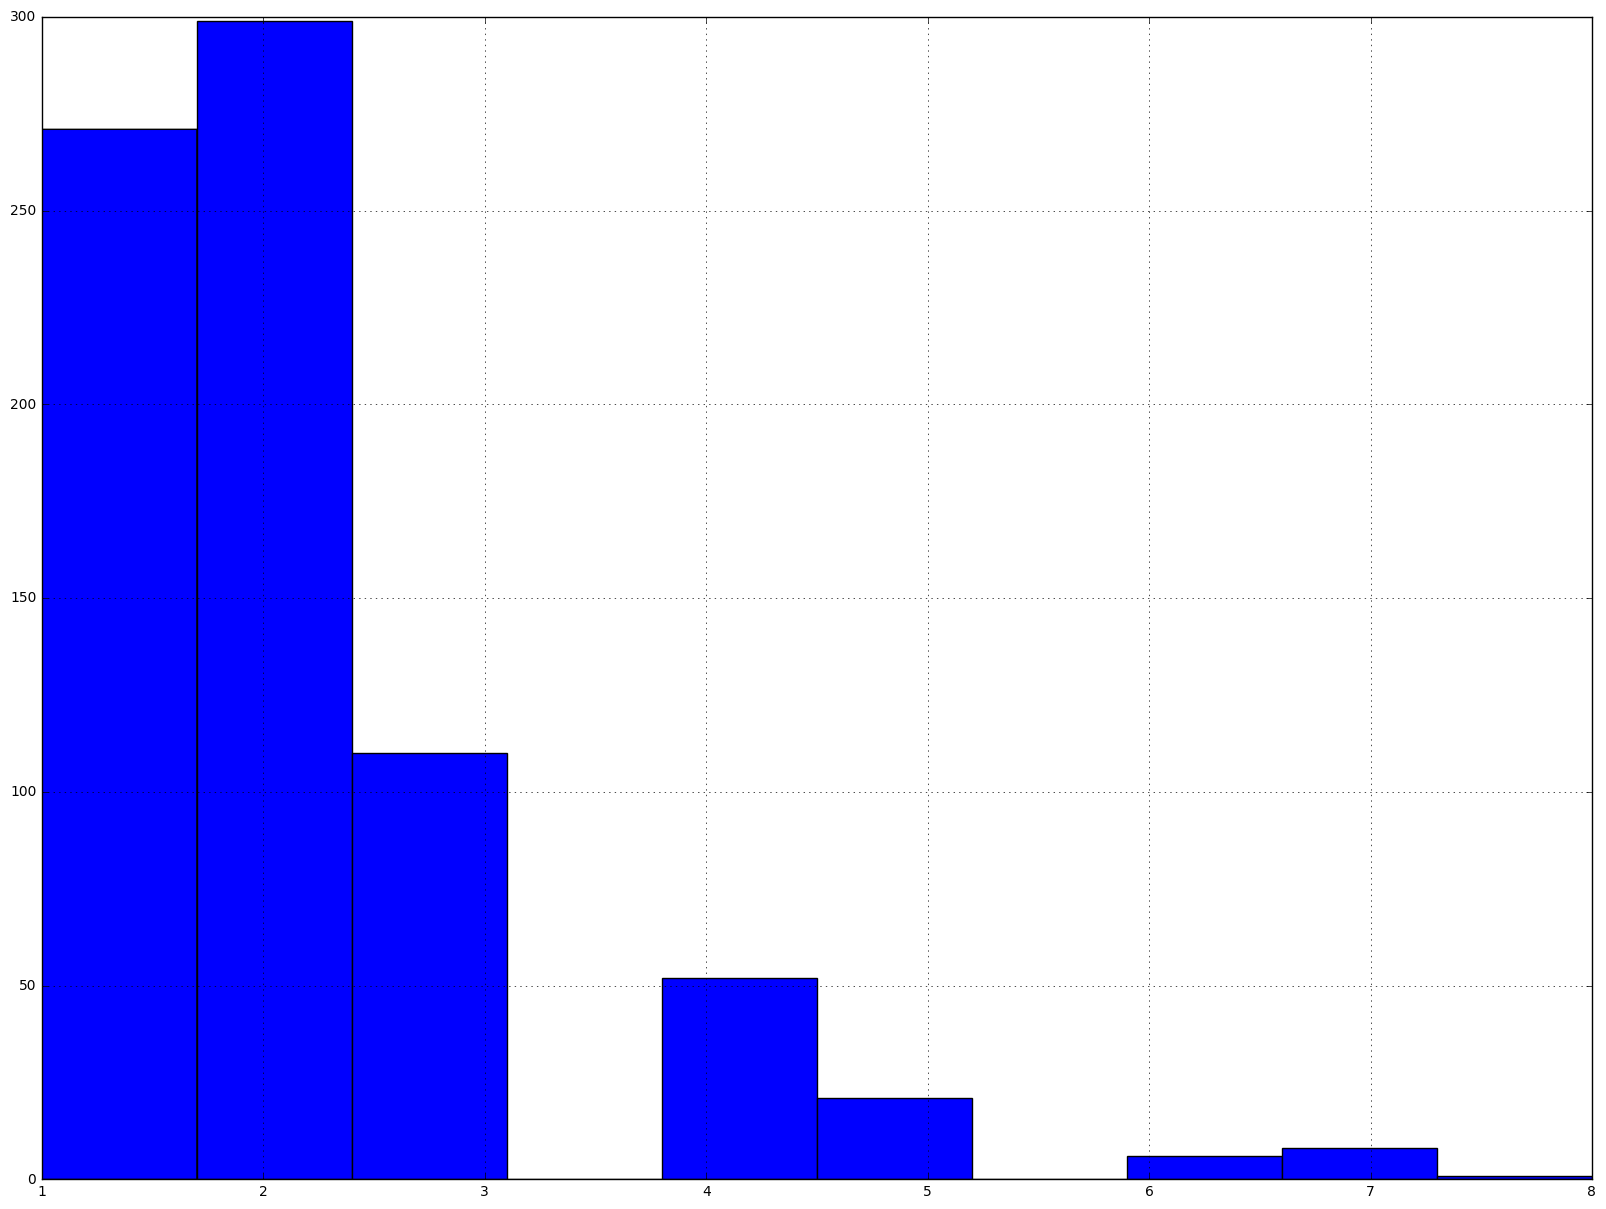

In [37]:
# For the leads that signed up, how many calls were received, on average?
leads_signedup_phones = leads[leads['Name'].isin(signups['Lead'].tolist())]['Phone Number'].tolist()
leads_signedup = calls[calls['Phone Number'].isin(leads_signedup_phones)]
print 'Number of calls on average: ',leads_signedup.groupby('Phone Number')['Call Outcome'].count().mean()
leads_signedup.groupby('Phone Number')['Call Outcome'].count().hist()

In [39]:
# Which agent had the most signups? 
# Which assumptions did you make? (note that there is a many-to-one relationship between calls and leads) 
leads_signedup_phones = leads[leads['Name'].isin(signups['Lead'].tolist())]['Phone Number'].tolist()
leads_signedup = calls[calls['Phone Number'].isin(leads_signedup_phones)]
leads_signedup.groupby('Agent')['Call Outcome'].value_counts()

Agent   Call Outcome   
black   CALL BACK LATER     92
        INTERESTED          49
        ANSWER MACHINE      22
blue    INTERESTED          52
        CALL BACK LATER     39
        ANSWER MACHINE       4
green   INTERESTED          67
        CALL BACK LATER     44
        ANSWER MACHINE       7
orange  CALL BACK LATER    317
        INTERESTED         284
        ANSWER MACHINE      61
red     INTERESTED         316
        CALL BACK LATER    212
        ANSWER MACHINE      46
Name: Call Outcome, dtype: int64

In [89]:
# Which agent had the most signups per call?
leads_signedup_phones = leads[leads['Name'].isin(signups['Lead'].tolist())]['Phone Number'].tolist()
leads_signedup = calls[calls['Phone Number'].isin(leads_signedup_phones)]
print 'INTERESTED calls per agent for signed up Leads:\n',leads_signedup[leads_signedup['Call Outcome']=='INTERESTED'].groupby('Agent')['Call Outcome'].count()
print '\nTotal number of calls per agent:\n', calls.groupby('Agent')['Call Outcome'].count()
print '\nSignups per call per agent:\n',leads_signedup[leads_signedup['Call Outcome']=='INTERESTED'].groupby('Agent')['Call Outcome'].count()/calls.groupby('Agent')['Call Outcome'].count()

INTERESTED calls per agent for signed up Leads:
Agent
black      49
blue       52
green      67
orange    284
red       316
Name: Call Outcome, dtype: int64

Total number of calls per agent:
Agent
black      750
blue       199
green      339
orange    2234
red       1478
Name: Call Outcome, dtype: int64

Signups per call per agent:
Agent
black     0.065333
blue      0.261307
green     0.197640
orange    0.127126
red       0.213802
Name: Call Outcome, dtype: float64


In [112]:
# Was the variation between the agents’ signups-per-call statistically significant? 


#this function creates a binary distribution where 1 means that the call was successful (lead signed up) and 0 otherwise
def agentCallDist(row,signedLeads):
    if row['Phone Number'] in signedLeads and row['Call Outcome']=='INTERESTED':
        return 1
    return 0
leads_signedup_phones = leads[leads['Name'].isin(signups['Lead'].tolist())]['Phone Number'].tolist()
signedup_calls = calls.copy(deep=True)
signedup_calls['Signup'] = signedup_calls.apply(lambda x: agentCallDist(x,leads_signedup_phones),axis=1)
grouped = signedup_calls.groupby('Agent')

agent_list = []
for agent,group in grouped:
    agent_list.append((agent,group['Signup'].tolist()))


for a,b in combinations(agent_list,2):
    print a[0]+' vs '+b[0]
    print ttest_ind(a[1],b[1],equal_var=False)


black vs blue
Ttest_indResult(statistic=-6.0295037539184992, pvalue=6.4238582282434348e-09)
black vs green
Ttest_indResult(statistic=-5.6380154816874262, pvalue=3.0077449233278108e-08)
black vs orange
Ttest_indResult(statistic=-5.3943045484836487, pvalue=7.8306281030122146e-08)
black vs red
Ttest_indResult(statistic=-10.622993716144999, pvalue=9.9136524082606499e-26)
blue vs green
Ttest_indResult(statistic=1.6754069807010947, pvalue=0.094671565927800377)
blue vs orange
Ttest_indResult(statistic=4.1919694998141246, pvalue=4.0160308671098035e-05)
blue vs red
Ttest_indResult(statistic=1.4397286046344311, pvalue=0.15121306001541823)
green vs orange
Ttest_indResult(statistic=3.095632251660422, pvalue=0.0020978107221804711)
green vs red
Ttest_indResult(statistic=-0.6693904100686876, pvalue=0.50354648648383604)
orange vs red
Ttest_indResult(statistic=-6.778637137145048, pvalue=1.4834424095372522e-11)


In [ ]:
# Why?
# The difference was not always statistically significant because the sample size of certain agents was too small.

# Statistical Significance

A statistically significant result isn’t attributed to chance and depends on two key variables: sample size and effect size.

**Sample size** refers to how large the sample for your experiment is. The larger your sample size, the more confident you can be in the result of the experiment.

**Effect size** refers to the size of the difference in results between the two sample sets and indicates practical significance.

**P-value** refers to the probability value of observing an effect from a sample. A p-value of < 0.05 is the conventional threshold for declaring statistical significance.



In [82]:
# A lead from which region is most likely to be “interested” in the product?
interested_phone_numbers = calls[calls['Call Outcome']=='INTERESTED']['Phone Number'].drop_duplicates().tolist()
interested_leads = leads[leads['Phone Number'].isin(interested_phone_numbers)]
interested_leads.groupby('Region')['Name'].count().sort_values(ascending=False)

Region
north-west          365
south-west          161
midlands            150
north-east          139
scotland            137
south-east          136
south                62
london               56
wales                50
northern-ireland     40
Name: Name, dtype: int64

In [83]:
# A lead from which sector is most likely to be “interested” in the product?
interested_phone_numbers = calls[calls['Call Outcome']=='INTERESTED']['Phone Number'].drop_duplicates().tolist()
interested_leads = leads[leads['Phone Number'].isin(interested_phone_numbers)]
interested_leads.groupby('Sector')['Name'].count().sort_values(ascending=False)

Sector
consultancy      301
retail           290
food             261
wholesale        233
entertainment    135
construction      46
agriculture       30
Name: Name, dtype: int64

In [88]:
# Given a lead has already expressed interest and signed up, 
#  - signups from which region are most likely to be approved? 

signups_approved = signups[signups['Approval Decision']=='APPROVED']['Lead'].tolist()
approved_leads = leads[leads['Name'].isin(signups_approved)]
(approved_leads.groupby('Region')['Name'].count().sort_values(ascending=False)/leads.groupby('Region')['Name'].count().sort_values(ascending=False)).sort_values(ascending=False)

Region
north-west          0.042411
scotland            0.032947
south-east          0.025893
south-west          0.023041
northern-ireland    0.021661
south               0.021314
north-east          0.017668
midlands            0.016079
wales               0.008651
london              0.007722
Name: Name, dtype: float64

In [118]:
leads['Region'].value_counts()# The average signup per call among all the agents is 0.173

north-west          2240
midlands            1617
north-east          1132
scotland            1123
south-east          1120
south-west          1085
wales                578
south                563
northern-ireland     277
london               259
Name: Region, dtype: int64

In [117]:
#  - Is this statistically significant? Why? 
leads_signedup = leads.merge(signups,how='right',left_on='Name',right_on='Lead')
leads_signedup['Outcome'] = leads_signedup['Approval Decision'].apply(lambda x: 1 if x=='APPROVED' else 0)
grouped = leads_signedup.groupby('Region')

region_list=[]
for region,group in grouped:
    region_list.append((region,group['Outcome'].tolist()))
    
for a,b in combinations(region_list,2):
    print a[0]+' vs '+b[0]
    print ttest_ind(a[1],b[1],equal_var=False)

london vs midlands
Ttest_indResult(statistic=-2.8166193689020051, pvalue=0.0064627253407762387)
london vs north-east
Ttest_indResult(statistic=-2.2422150122670712, pvalue=0.028497084925772478)
london vs north-west
Ttest_indResult(statistic=-5.7107267176057137, pvalue=8.1779523208189802e-07)
london vs northern-ireland
Ttest_indResult(statistic=-1.6049996166787139, pvalue=0.11669698531301076)
london vs scotland
Ttest_indResult(statistic=-4.7437687303351206, pvalue=9.9749267814195486e-06)
london vs south
Ttest_indResult(statistic=-2.8616307879775889, pvalue=0.0061174629331057261)
london vs south-east
Ttest_indResult(statistic=-3.4079958317476104, pvalue=0.0010992375374041161)
london vs south-west
Ttest_indResult(statistic=-2.3588810829703326, pvalue=0.021815429070921225)
london vs wales
Ttest_indResult(statistic=-0.80919237218111573, pvalue=0.42177841668981153)
midlands vs north-east
Ttest_indResult(statistic=0.62024935164892958, pvalue=0.53592181148538365)
midlands vs north-west
Ttest_in

In [ ]:
# Suppose you wanted to pick the 1000 leads most likely to sign up (who have not been called so far), 
# based only on age, sector and region.
# What criteria would you use to pick those leads? [10]
# In what sense are those an optimal criteria set? [3]
# How many signups would you expect to get based on those called leads, assuming they were being called by random agents? [3]
# If you could choose the agents to make those calls, who would you choose? Why? [3]

In [127]:
#In order to answer the last set of question we need to investigate the data first.
# Lets see what are the age, sector and region for the signed up leads

signed_leads = leads.merge(signups, how='right',left_on='Name',right_on='Lead')
print 'Top Age for signups'
print signed_leads['Age'].value_counts().sort_values(ascending=False)[:10]
print '\nTop Region for signups'
print signed_leads['Region'].value_counts().sort_values(ascending=False)[:10]
print '\nTop Sector for signups'
print signed_leads['Sector'].value_counts().sort_values(ascending=False)[:10]

Top Age for signups
18    44
19    40
20    37
30    29
27    29
22    28
21    28
24    27
23    27
25    25
Name: Age, dtype: int64

Top Region for signups
north-west          210
south-west          102
midlands             91
south-east           86
north-east           82
scotland             82
wales                34
south                32
london               25
northern-ireland     24
Name: Region, dtype: int64

Top Sector for signups
food             174
retail           174
consultancy      160
wholesale        143
entertainment     79
construction      25
agriculture       13
Name: Sector, dtype: int64


In [ ]:
# What criteria would you use to pick those leads? 
# Age between 18-20
# Region north-west and south-west
# Sector food, retail, consultancy, wholesale

In [ ]:
# In what sense are those an optimal criteria set?
# Those are optimal criteria because most of the leads who signed up for the product had them.

In [168]:
# How many signups would you expect to get based on those called leads, assuming they were being called 
# by random agents?
# Now lets see how many leads with those criteria signed up

optimal_leads_age = leads[leads['Age']<21 ]
optimal_leads_region = leads[leads['Region'].isin(['north-west','south-west']) ]
optimal_leads_sector = leads[leads['Sector'].isin(['food','retail','consultancy','wholesale'])]
optimal_leads = pd.concat([optimal_leads_age,optimal_leads_region,optimal_leads_sector])
optimal_leads = optimal_leads.drop_duplicates()
optimal_leads_selected = optimal_leads_region[optimal_leads_region['Sector'].isin(['food','retail','consultancy','wholesale'])]
optimal_leads_selected.sort_values(by=['Age'],inplace=True)
optimal_leads_selected[optimal_leads_selected['Name'].isin(signups['Lead'].tolist())].shape

#It turns out that 10% of leads with the selected criteria signed up for the product

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(261, 5)